<a href="https://colab.research.google.com/github/frcaulia/machine_learning/blob/main/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**
Machine Learning Course : Module 3 Lab Work Assignment

---

**General Instruction**
*   You will be using the "Medical Cost Personal Datasets" dataset. Make sure you have downloaded this dataset.
*   Use the Python programming language and appropriate libraries such as NumPy, Pandas, Matplotlib, and Scikit-Learn to perform regression analysis and SVR.

In [11]:
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('JS3-LW-Assignment-Insurance.csv')

In [13]:
# inspect first data
data.head()

# check data size
data.shape

# check general information
data.info()

# check data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **1. Identify the variables that will be used as independent variables (features) and the target variable (personal medical costs).**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


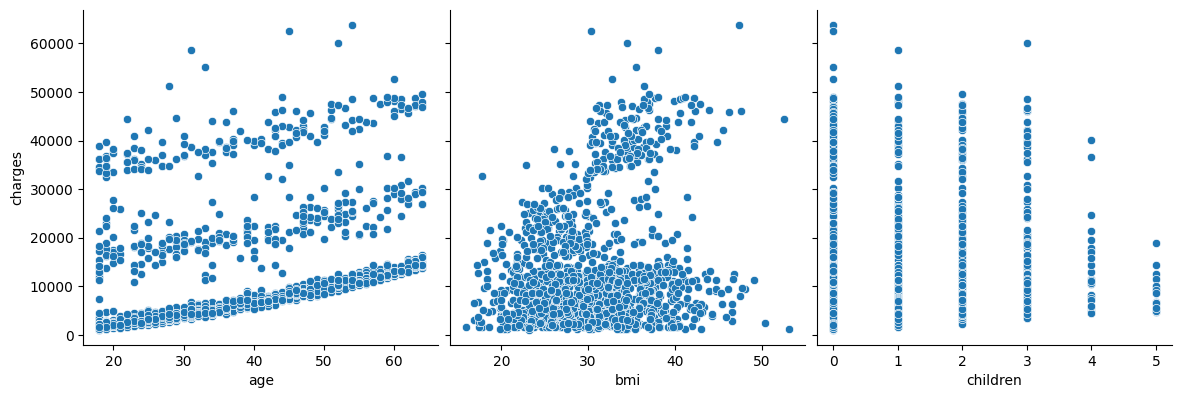

<ipython-input-14-f6d1af99bd99>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


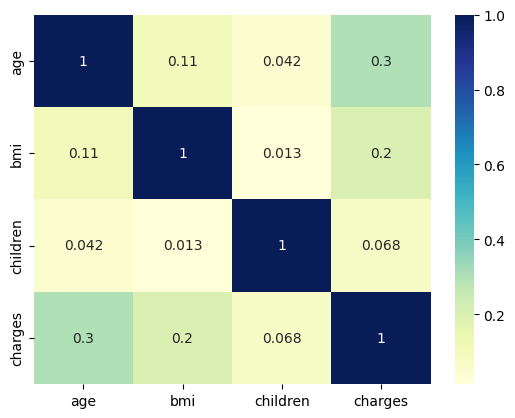

In [14]:
# import library
import matplotlib.pyplot as plt
import seaborn as sns

# visualize the data using pairplot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualize the data correlation using heatmaps
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
# X is independen variabel, Y is dependen variable
X = data['age']
y = data['charges']

### **2. Split the dataset into training (train) and testing (test) data with an appropriate proportion**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### **3. Perform feature scaling if necessary**

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

try:
    # Fit and transform your training data
    X_train = scaler.fit_transform(X_train)

    # Transform your testing data using the same scaler
    X_test = scaler.transform(X_test)
except ValueError as e:
    print("")

### **4. Create a multiple linear regression model using Scikit-Learn**

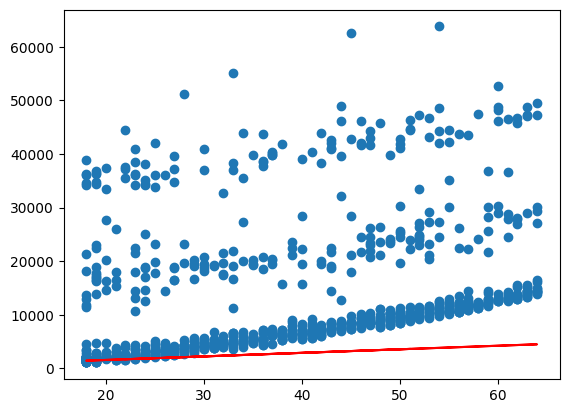

In [20]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### **5. Train the model on the training data and make predictions on the testing data.**

<ipython-input-21-0c93ba5dbe5a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


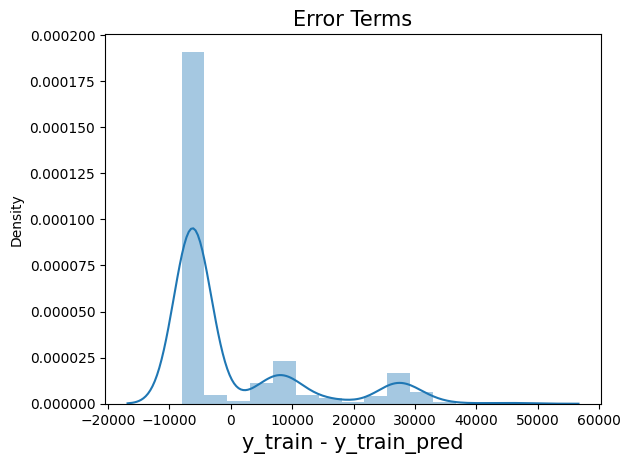

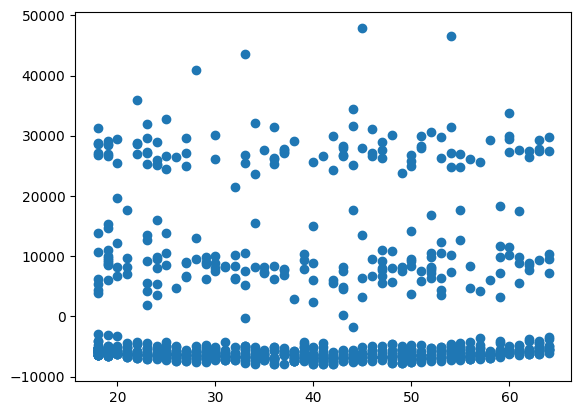

In [21]:
# Make prediction
y_train_pred = lr.predict(X_train_sm)

# Calculate residual
res = (y_train - y_train_pred)

# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

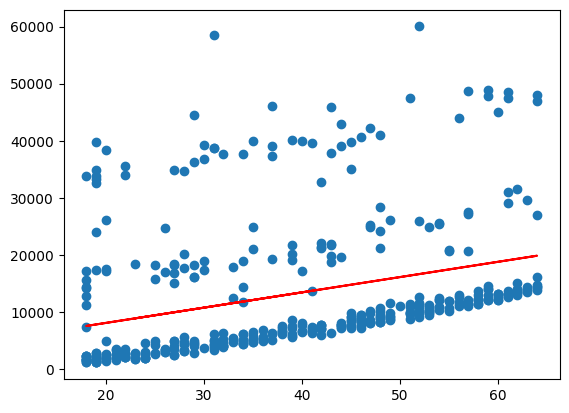

In [22]:
# Make a prediction using testing data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

### **6. Evaluate the model by calculating metrics such as R-squared, MSE, and MAE. Display the evaluation results.**

Linear Regression Evaluation Results:
R-squared (R2): 0.7672642952734356
Mean Squared Error (MSE): 35117755.73613632
Mean Absolute Error (MAE): 4243.654116653146
SVR Evaluation Results:
R-squared (R2): -0.09398492771004863
Mean Squared Error (MSE): 165072632.56178495
Mean Absolute Error (MAE): 8478.45676207452


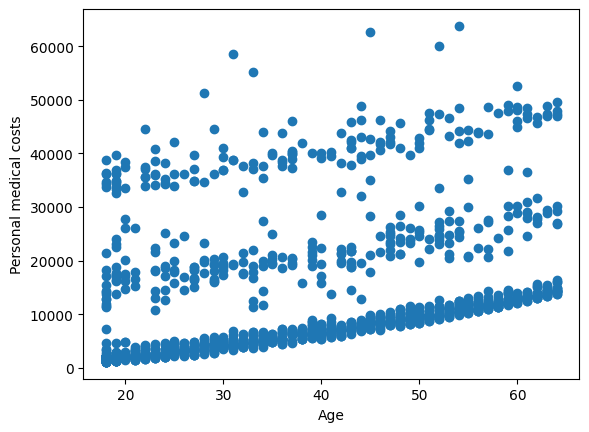

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} Evaluation Results:')
    print('R-squared (R2):', r2)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)

evaluate_model(y_test, y_pred_lin, 'Linear Regression')
evaluate_model(y_test, y_pred_svr, 'SVR')

# Data Visualization
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Personal medical costs')
plt.show()